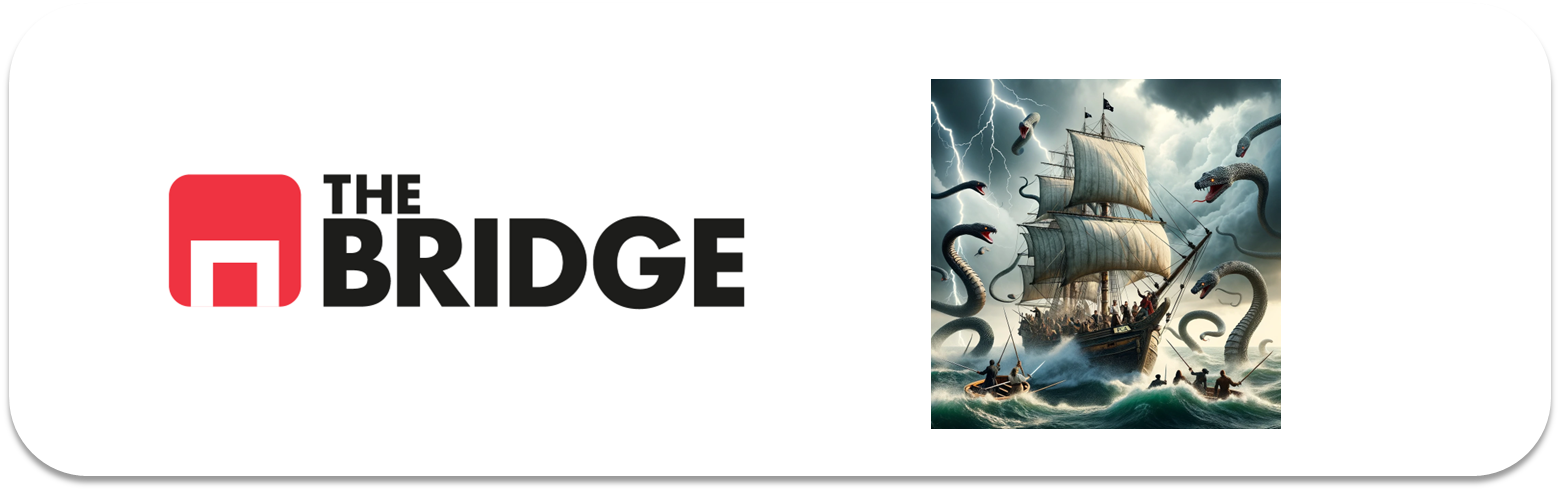

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel, RFE, SequentialFeatureSelector, VarianceThreshold
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import pearsonr, mannwhitneyu, chi2_contingency
import xgboost
import bootcampviztools as bt

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

In [2]:
df_credit = pd.read_csv('./data/credit_npo.csv')
df_credit

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [3]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
# eliminamos nulos

df_credit.dropna(inplace= True)

In [5]:
# vamos a ver como podemos disminuir la cantidad de valores unicos en las columnas number of

number_of = [col for col in df_credit.columns if col.startswith('NumberOf')]

for col in number_of:
    print(col.upper(), '\n')
    print(f'Cardinalidad -> {df_credit[col].nunique()}')
    print(f'Valores -> {sorted(df_credit[col].unique())}')
    print('-'*20, '\n')

# vamos a convertir en categoricas las columnas de NumberOfTime... la cantidad de veces que han estado esos periodos con deuda. vamos a convertirlas en binarias, True o False si han llegado a esa cantidad de dias con deuda o no
# lo hacemos en la siguiente celda

NUMBEROFTIME30-59DAYSPASTDUENOTWORSE 

Cardinalidad -> 10
Valores -> [0, 1, 2, 3, 4, 5, 6, 7, 8, 98]
-------------------- 

NUMBEROFOPENCREDITLINESANDLOANS 

Cardinalidad -> 43
Valores -> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 40, 41, 43, 48, 49]
-------------------- 

NUMBEROFTIMES90DAYSLATE 

Cardinalidad -> 13
Valores -> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 98]
-------------------- 

NUMBEROFTIME60-89DAYSPASTDUENOTWORSE 

Cardinalidad -> 8
Valores -> [0, 1, 2, 3, 4, 5, 11, 98]
-------------------- 

NUMBEROFDEPENDENTS 

Cardinalidad -> 10
Valores -> [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0]
-------------------- 



In [6]:
def pasar_binario(data):
    return False if data == 0 else True

number_of = [col for col in df_credit.columns if col.startswith('NumberOfTime')]

for col in number_of:
    df_credit[col] = df_credit[col].apply(pasar_binario)
    print(df_credit[col].value_counts(), '\n', '-'*10)

NumberOfTime30-59DaysPastDueNotWorse
False    9818
True     1998
Name: count, dtype: int64 
 ----------
NumberOfTimes90DaysLate
False    11156
True       660
Name: count, dtype: int64 
 ----------
NumberOfTime60-89DaysPastDueNotWorse
False    11206
True       610
Name: count, dtype: int64 
 ----------


2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.

In [7]:
train_set, test_set = train_test_split(df_credit, test_size= 0.2, stratify= df_credit['SeriousDlqin2yrs'] ,random_state= 42)

In [8]:
x_train = train_set.drop('SeriousDlqin2yrs', axis= 1)
y_train = train_set['SeriousDlqin2yrs']

x_test = test_set.drop('SeriousDlqin2yrs', axis= 1)
y_test = test_set['SeriousDlqin2yrs']

In [9]:
numericas = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans']
categoricas = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberRealEstateLoansOrLines', 'NumberOfDependents']

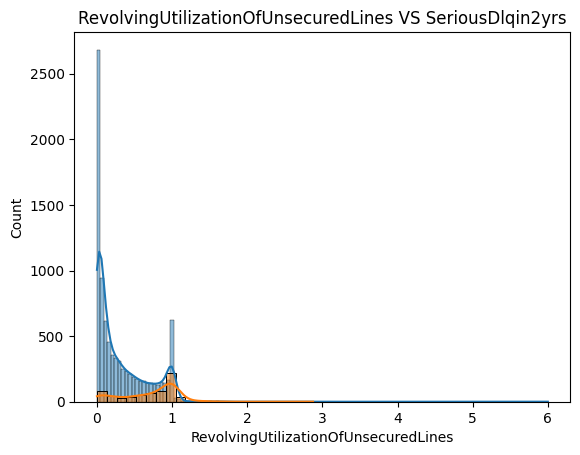

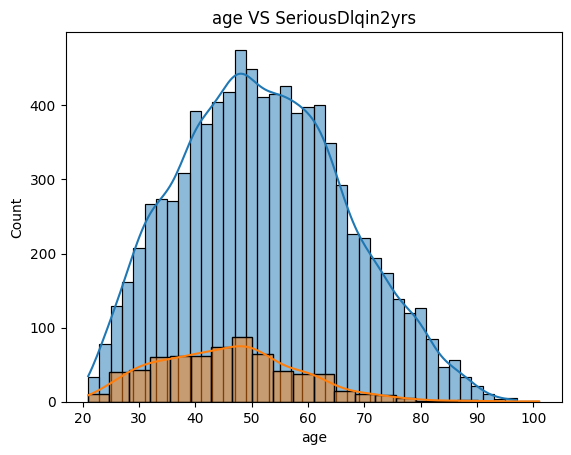

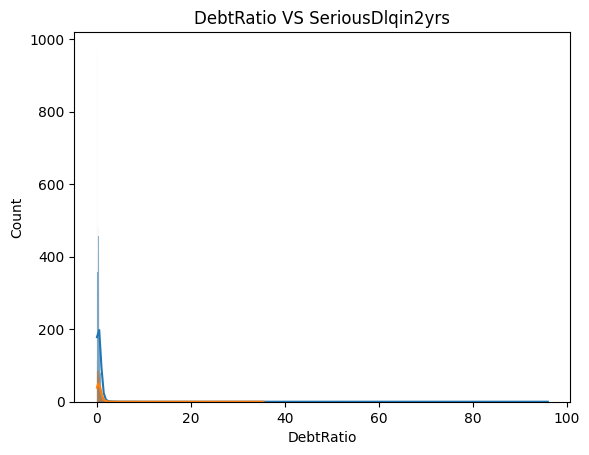

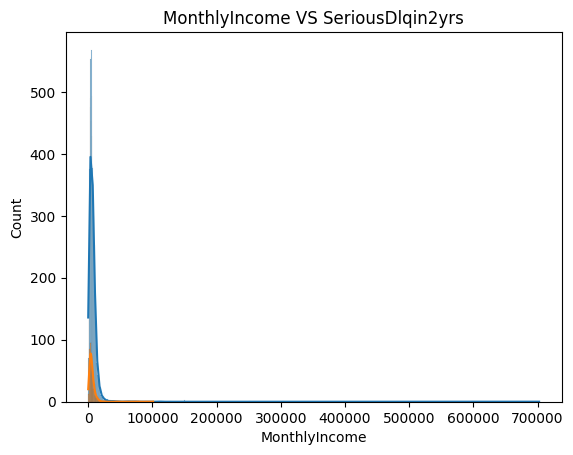

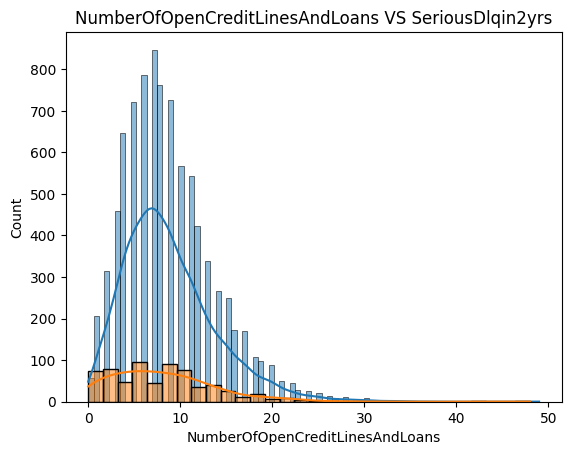

In [10]:
# empezamos comparando las columnas numericas con el target(categorica binaria)

for var in numericas:
    sns.histplot(train_set[train_set['SeriousDlqin2yrs'] == 0][var], kde= True)
    sns.histplot(train_set[train_set['SeriousDlqin2yrs'] == 1][var], kde= True)
    plt.title(f'{var} VS SeriousDlqin2yrs')
    plt.show()

In [11]:
# en principio me parecen llamativas 'RevolvingUtilizationOfUnsecuredLines', 'age' y 'NumberOfOpenCreditLinesAndLoans'

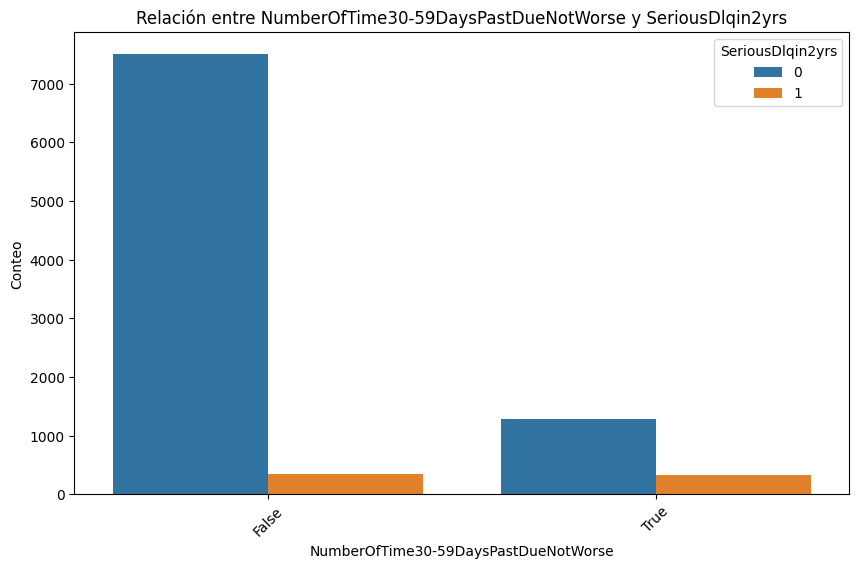

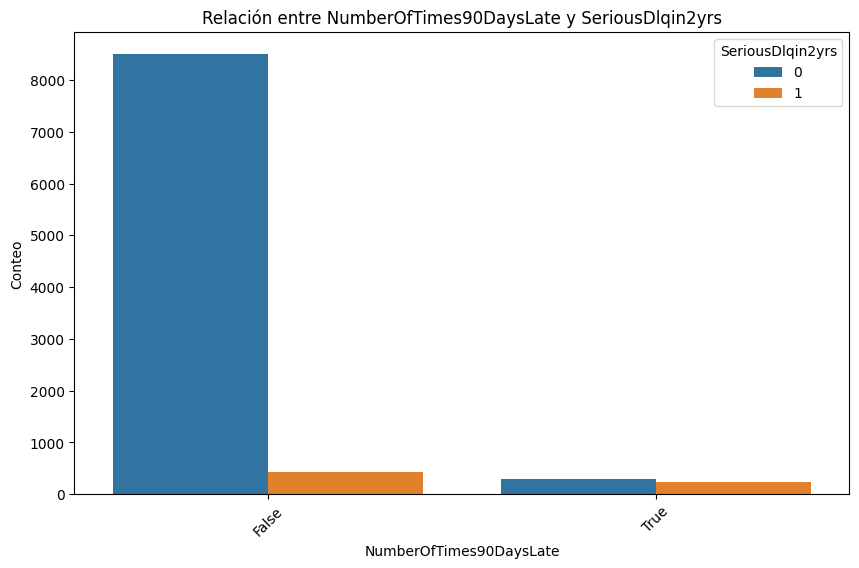

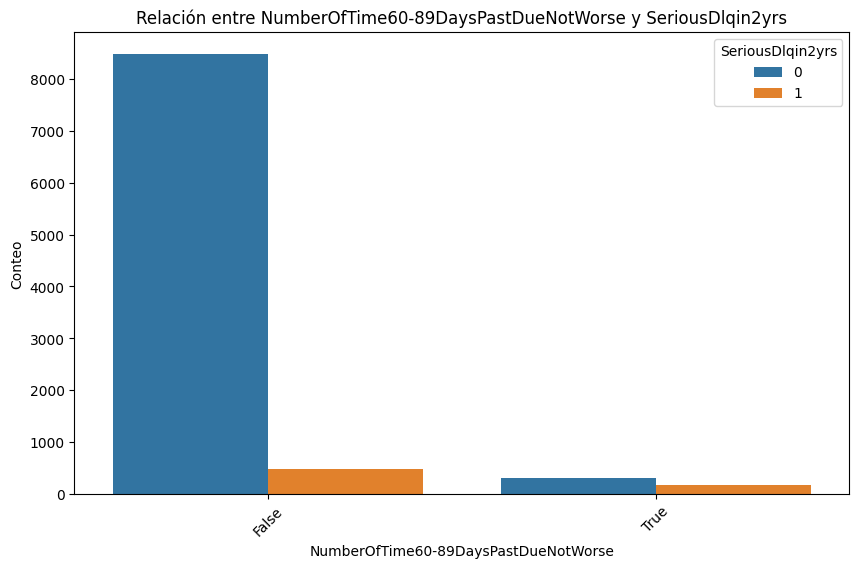

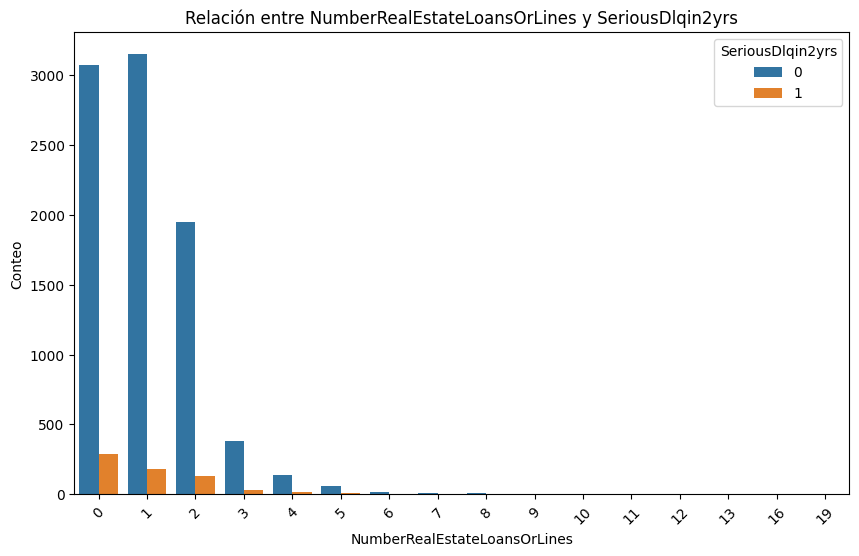

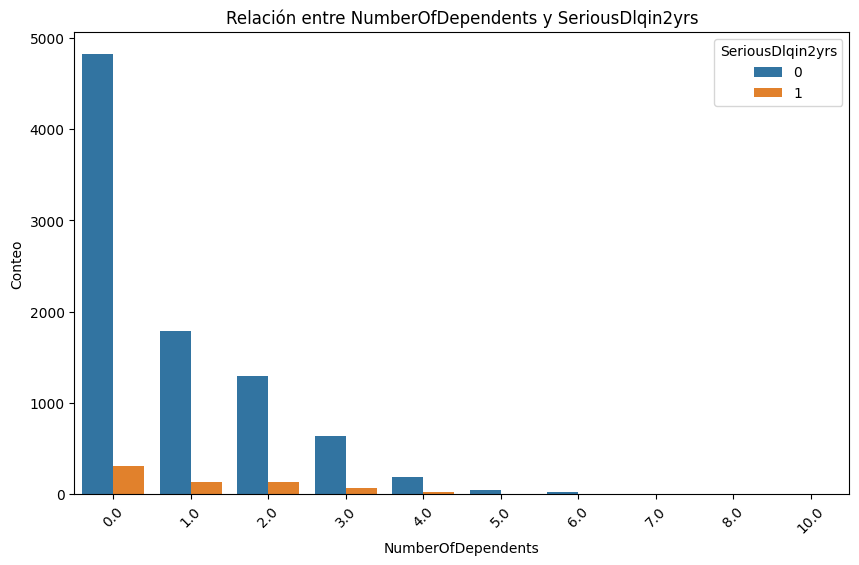

In [12]:
for var in categoricas:
    bt.plot_categorical_relationship_fin(train_set, var, 'SeriousDlqin2yrs', size_group= 20)

In [13]:
# en principio todas me parecen interesantes, a ver los test y la corelacion que dicen

corr= train_set.corr()
serie_corr = np.abs(corr.loc[numericas]['SeriousDlqin2yrs'])
serie_corr.sort_values(ascending = False)

# un poco miserables los resultados, RevolvingUtilizationOfUnsecuredLines es la unica numerica que parece minimamente relevante

RevolvingUtilizationOfUnsecuredLines    0.277475
age                                     0.105251
NumberOfOpenCreditLinesAndLoans         0.033514
MonthlyIncome                           0.025449
DebtRatio                               0.000089
Name: SeriousDlqin2yrs, dtype: float64

In [14]:
corr= train_set.corr()
serie_corr = np.abs(corr['SeriousDlqin2yrs'])
serie_corr.sort_values(ascending = False)

''' 
tecnicamente podemos mirarlas todas en correlacion puesto que aun las categoricas estan expresadas en numeros, asi si sacamos algunas variables interesantes, como 

NumberOfTimes90DaysLate                 
RevolvingUtilizationOfUnsecuredLines    
NumberOfTime60-89DaysPastDueNotWorse    
NumberOfTime30-59DaysPastDueNotWorse
'''

' \ntecnicamente podemos mirarlas todas en correlacion puesto que aun las categoricas estan expresadas en numeros, asi si sacamos algunas variables interesantes, como \n\nNumberOfTimes90DaysLate                 \nRevolvingUtilizationOfUnsecuredLines    \nNumberOfTime60-89DaysPastDueNotWorse    \nNumberOfTime30-59DaysPastDueNotWorse\n'

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features:   
    ~~1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.~~  
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 

In [15]:
umbral_varianza = 0.5

var_selector = VarianceThreshold(umbral_varianza)
var_selector.fit(x_train)
print("Lista seleccionada para selector de Varianza", var_selector.get_feature_names_out())

# literalmente ha cogido la que menos correlacion tienen, no me fio un pelo, me voy a quedar con las que indica la correlacion

features_prov = ['NumberOfTimes90DaysLate', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTime30-59DaysPastDueNotWorse ', 'age'] # una lista de provisionales

Lista seleccionada para selector de Varianza ['age' 'DebtRatio' 'MonthlyIncome' 'NumberOfOpenCreditLinesAndLoans'
 'NumberRealEstateLoansOrLines' 'NumberOfDependents']


In [16]:
selector = SelectKBest(f_classif, k=5)
x_data_kbest = selector.fit_transform(x_train[numericas], y_train)
X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
X_train_kbest.columns

# encaja bastante bien con las correlaciones, al final esas columnas van a ser buenas

Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans'],
      dtype='object')

In [17]:
for col in categoricas:
    print(f"MI({col};{'SeriousDlqin2yrs'}):", mutual_info_score(train_set[col],train_set['SeriousDlqin2yrs']))

    # no es que arrogen una barbaridad de info, 0.03 el mas elevado? meh

MI(NumberOfTime30-59DaysPastDueNotWorse;SeriousDlqin2yrs): 0.020831100086090043
MI(NumberOfTimes90DaysLate;SeriousDlqin2yrs): 0.03315981105348048
MI(NumberOfTime60-89DaysPastDueNotWorse;SeriousDlqin2yrs): 0.019220687427717945
MI(NumberRealEstateLoansOrLines;SeriousDlqin2yrs): 0.0030180949211685896
MI(NumberOfDependents;SeriousDlqin2yrs): 0.0013420958548587677


In [18]:
features_prov_1 = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate']

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features:   
    ~~1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.~~    
    ~~2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information~~    
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)

In [19]:
rf_selector = RandomForestClassifier(random_state= 42)

rf_selector.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [22]:
selector_model = SelectFromModel(estimator = rf_selector, threshold= "mean")

selector_model.fit(x_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold='mean')

In [23]:
selector_model.get_feature_names_out()

# me llama la atencion que no coge ninguna variable de veces endeudado en cierta cantidad de dias

array(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans'], dtype=object)

In [24]:
features_prov_2 = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans']

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features:   
    ~~1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.~~  
    ~~2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information~~   
    ~~3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)~~  
    4. Selección de las mejores features empleando RFE.

In [25]:
rf_selector_1 = RandomForestClassifier(random_state= 42)

In [26]:
rfe = RFE(estimator = rf_selector_1,
          n_features_to_select= 5,
          step = 1) 
rfe.fit(x_train, y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=5)

In [32]:
pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = x_train.columns).sort_values("ranking")
# coinciden con la seleccion por modelo

,ranking
RevolvingUtilizationOfUnsecuredLines,1
age,1
DebtRatio,1
MonthlyIncome,1
NumberOfOpenCreditLinesAndLoans,1
NumberOfTimes90DaysLate,2
NumberOfDependents,3
NumberRealEstateLoansOrLines,4
NumberOfTime60-89DaysPastDueNotWorse,5
NumberOfTime30-59DaysPastDueNotWorse,6


In [33]:
features_prov_3 = features_prov_2.copy()

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features:   
    ~~1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.~~  
    ~~2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information~~   
    ~~3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)~~  
    ~~4. Selección de las mejores features empleando RFE.~~  
    5. Selección de las mejores features empleando SFS.

In [34]:
rf_SFS = RandomForestClassifier(random_state = 42)

sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 5,
                                        cv = 4,
                                        scoring = "balanced_accuracy") # balanced accuracy porque de cara a los deudores creo que es mas interesante el recall


sfs_forward.fit(x_train, y_train)

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(random_state=42),
                          n_features_to_select=5, scoring='balanced_accuracy')

In [35]:
sfs_forward.get_feature_names_out() # no se porque pero me gustan mas estas variables, subjetivo

array(['RevolvingUtilizationOfUnsecuredLines',
       'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfDependents'], dtype=object)

In [36]:
features_prov_4 = ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfDependents']

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features:   
    ~~1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.~~  
    ~~2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information~~   
    ~~3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)~~  
    ~~4. Selección de las mejores features empleando RFE.~~  
    ~~5. Selección de las mejores features empleando SFS.~~   
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

In [40]:
import pprint

features_list = [features_prov, features_prov_1, features_prov_2, features_prov_3, features_prov_4]
lista_final = dict()

for lista_prov in features_list:
    for var in lista_prov:

        if var not in lista_final.keys():
            lista_final[var] = 1
        else:
            lista_final[var] += 1

pprint.pprint(lista_final)

{'DebtRatio': 3,
 'MonthlyIncome': 3,
 'NumberOfDependents': 1,
 'NumberOfOpenCreditLinesAndLoans': 3,
 'NumberOfTime30-59DaysPastDueNotWorse': 1,
 'NumberOfTime30-59DaysPastDueNotWorse ': 1,
 'NumberOfTime60-89DaysPastDueNotWorse': 1,
 'NumberOfTimes90DaysLate': 3,
 'NumberRealEstateLoansOrLines': 1,
 'RevolvingUtilizationOfUnsecuredLines': 5,
 'age': 4}


In [44]:
# pues aqui estamos, vamos a eliminar los que solo han aparecido 1 o 2 veces (ninguna ha aparecido 2 en verdad pero bueno)

features_prov_5 = list()

for var, q in lista_final.items():

    if q not in [1, 2]:
        features_prov_5.append(var)

features_prov_5 # aqui tenemos nuestras 6 features finales


['NumberOfTimes90DaysLate',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans']

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

In [45]:
features_list.append(features_prov_5) # vamos a iterar por aqui ahora despues

In [49]:
x_train_1

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
2031,0.039187,61,False,0.269356,3073.0,7,False,2,False,0.0
10352,0.919317,41,False,0.162696,3945.0,3,False,0,False,0.0
497,0.253718,49,False,0.247302,13250.0,19,False,2,False,0.0
10341,0.249462,26,False,0.882353,764.0,4,False,0,False,0.0
4043,0.224520,76,False,0.462710,3150.0,6,False,1,False,0.0
...,...,...,...,...,...,...,...,...,...,...
4371,0.174437,61,False,0.704053,7203.0,7,False,1,False,0.0
5767,0.039651,64,False,0.121458,15667.0,6,False,1,False,0.0
7494,1.000000,29,False,0.000000,2040.0,0,False,0,False,6.0
11693,0.945805,51,True,0.671629,4500.0,16,False,1,False,0.0


In [48]:
# vamos a utilizar randomforest, xgboost y regresion logistica que por la experiencia de pasados ejercicios estoy cogiendole aprecio 

modelos_random_forest = []
modelos_xgboost = []
modelos_regresion_logistica = []

x_train_1 = x_train.copy()

for selection in features_list:

    modelos_random_forest.append(RandomForestClassifier(random_state= 42).fit(x_train_1[selection], y_train))


# mi idea es automatizar esto para generar 6 modelo de cada tipologia de modelo acorde a las 6 selecciones diferentes de features, almacenarlos en listas y luego probarlos y seleccionar los mejores, lo que
# pide el enunciado en verdad pero quiero automatizarlo.

# el caso es que no llego a tiempo para presentarlo a clase que comienza en breve asi que he quedado por aqui


KeyError: "['NumberOfTime30-59DaysPastDueNotWorse '] not in index"

[RandomForestClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 RandomForestClassifier(random_state=42)]

### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.